# Projet numérique

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import math

Les équations de Lotka-Volterra, ou “modèle proie-prédateur”, sont couramment
utilisées pour décrire la dynamique de systèmes biologiques dans lesquels un
prédateur et sa proie interagissent dans un milieu commun. Elles ont été proposées
indépendamment par A. J. Lotka en 1925 et V. Volterra en 1926 et s’écrivent de
la manière suivante :
$$ \dot{x_1} = x_1 (\alpha - \beta x_2) $$
$$ \dot{x_2} = -x_2(\gamma - \delta x_1) $$

où $x_1$ et $x_2$ désignent le nombre (positif) de proies et de prédateurs respectivement
et $\alpha$, $\beta$, $\gamma$ et $\delta$ sont des paramètres strictement positifs.

1. Donner une interprétation physique à chaque terme de la dynamique.
Montrer qu’il existe deux points d’équilibre $(0, 0)$ et $\overline{x} \in \mathbb{R}_{>0} \times \mathbb{R}_{>0}$. Que
peut-on dire de leur stabilité à ce stade ?

**Réponse**

Dans l'expression de $\dot{x_1}$, le coefficient $\alpha > 0$ devant $x_1$ témoigne du fait que plus il y a de proies, plus il y a d'accouplements, et donc de naissances. Quant au terme $-\beta x_1 x_2$, il témoigne du fait que plus il y a de prédateurs, plus le nombre de proies va diminuer, et ce proportionnelement au nombre de proies et de prédateurs.

Dans l'expression de $\dot{x_2}$, le coefficient $-\gamma$ devant $x_2$ vient du fait que plus il y a de prédateurs, plus la concurrence pour l'accès à la nourriture est rude. Ainsi, la survie est plus difficile et le nombre prédateur diminue. Le terme $\delta x_1 x_2$ correspond au fait que plus il y a de proies, mieux les prédateurs survivent, et donc se multiplient.

Notons $f$ la fonction de $\mathbb{R} \times \mathbb{R}$ dans $\mathbb{R} \times \mathbb{R}$, telle que
$$
        f(x_1, x_2) = 
        \begin{pmatrix}
        \alpha x_1 - \beta x_1 x_2 \\
        -\gamma x_2 + \delta x_1 x_2
        \end{pmatrix}
$$

Les points d'équilibres cherchés sont les points $(x_1,x_2)\in\mathbb{R}_{>0} \times \mathbb{R}_{>0}$ tels que $f(x_1, x_2) = 0$. On obtient $(0,0)$ et $\overline{x}=(\frac{\gamma}{\delta},\frac{\alpha}{\beta})$. Etudions leur stabilité à l'aide de la jacobienne de la fonction $f$ qui caratérise le système.

$$
        J_f(x_1, x_2) = 
        \begin{pmatrix}
        \alpha - \beta x_2 & \delta x_2 \\
        -\beta x_1 & -\gamma + \delta x_1 
        \end{pmatrix}
$$

$J_f (0,0)$ admet $\alpha > 0$ (et $-\gamma$) comme valeurs propres, donc $(0,0)$ est un point d'équilibre instable.

$J_f (\frac{\gamma}{\delta},\frac{\alpha}{\beta})$ admet $i \sqrt{\gamma \alpha}$ et $-i \sqrt{\gamma \alpha}$ comme valeurs propres. Comme leur partie réelle est nulle, le critère de Hurwitz est insuffisant pour déterminer la stabilité de ce point d'équilibre.

2. A l’aide des fonctions meshgrid et quiver, visualiser graphiquement le
champ de vecteurs. Intuiter le comportement des solutions. On pourra
aussi utiliser streamplot pour visualiser le portrait de phase.

In [3]:
a = 1 #alpha
b = 0.5 #beta
c = 0.5 #gamma
d = 0.5 #delta
xb = (c/d,a/b) #x barre

In [4]:
def f(x1,x2) :
    return np.array([x1*(a-b*x2),-x2*(c-d*x1)])

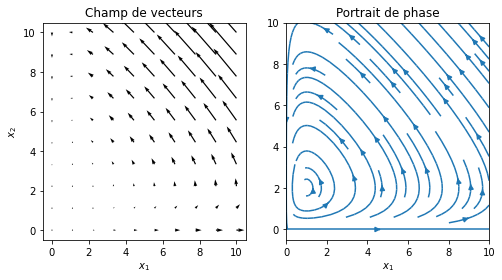

In [5]:
fig = plt.figure(figsize = (8,4))

ax1 = plt.subplot(1,2,1)
ax1.set_title("Champ de vecteurs")
ax1.set_xlabel('$x_1$')
ax1.set_ylabel('$x_2$')
x = np.linspace(0,10,10)
y = np.linspace(0,10,10)
X, Y = np.meshgrid(x, y)
U, V = f(X,Y)
ax1.quiver(X,Y,U,V)

ax2 = plt.subplot(1,2,2)
ax2.set_title("Portrait de phase")
ax2.set_xlabel('$x_1$')
x = np.linspace(0,10,100)
y = np.linspace(0,10,100)
X, Y = np.meshgrid(x, y)
U, V = f(X,Y)
ax2.streamplot(X, Y, U, V, density=0.6)

plt.show()

Les solutions semblent tourner autour du point d'équilibre $\overline{x}$, ce dernier étant visiblement stable.

3. Par le théorème de Cauchy-Lipschitz, démontrer que toute solution initialisée
dans $\mathbb{R}_{>0} \times \mathbb{R}_{>0}$ reste dans $\mathbb{R}_{>0} \times \mathbb{R}_{>0}$ sur son ensemble de définition

**Réponse**

Raisonnons par l'absurde avec une solution $x$ telle que $x(t_0) \in \mathbb{R}_{>0} \times \mathbb{R}_{>0}$ mais dont une des composantes s'annule en $t_1$. On suppose par exemple que cette composante est $x_1$.

$x_1(t_0) \neq 0$ mais $x_1(t_1) = 0$. Or 
$$
        f(x_1, x_2) = 
        \begin{pmatrix}
        \alpha x_1 - \beta x_1 x_2 \\
        -\gamma x_2 + \delta x_1 x_2
        \end{pmatrix}
$$ 
est de classe $C^1$. Et on remarque que $t \longrightarrow (0,x_2(t_1)e^{-\gamma (t - t_1)})$ est solution du problème 
$$
\begin{pmatrix}
        \dot{y_1} \\
        \dot{y_2}
\end{pmatrix}
= f(y_1,y_2)
$$
et $(y_1(t_1) = 0,y_2(t_1) = x_2(t_1))$ donc le théorème de Cauchy-Lipschtz assure que c'est l'unique couple solution. Par conséquent, $x_1 (t_0) = 0$, ce qui est absurde.

Le raisonnement serait le même si la composante étudiée était $x_2$.

Donc toute solution initialisée
dans $\mathbb{R}_{>0} \times \mathbb{R}_{>0}$ reste dans $\mathbb{R}_{>0} \times \mathbb{R}_{>0}$ sur son ensemble de définition


***Les questions quatre et cinq correspondent à celles de l'ancien énoncé***

4. On considère la fonction
$$ H(x_1, x_2) = \delta x_1 - \gamma \ln{x_1} + \beta x_2 - \alpha \ln{x_2} $$
définie sur $\mathbb{R}_{>0} \times \mathbb{R}_{>0}$. Calculer la dérivée de $H$ le long des solutions
initialisées dans $\mathbb{R}_{>0} \times \mathbb{R}_{>0}$. En déduire que toute solution maximale
initialisée dans $\mathbb{R}_{>0} \times \mathbb{R}_{>0}$ est définie sur $\mathbb{R}$ et que $\overline{x}$ est stable.

**Réponse**

Notons $X = \mathbb{R}_{>0} \times \mathbb{R}_{>0}$
- On obtient, pour $(x_1,x_2)\in X$,
$
\nabla H(x_1,x_2)=
        \begin{pmatrix}
        \delta - \frac{\gamma}{x_1} \\
        \beta - \frac{\alpha}{x_2}
        \end{pmatrix}
$  
Soit $t \mapsto x(t)$ une solution initialisée dans $X$ et définie sur $I$. On a, pour $t \in I$, $H'(x(t)) = \langle \nabla H(x(t)) , f(x(t)) \rangle = 0$ après calculs.


- Soit $x \in X$,
$$\boxed{
H(x) - H(\overline{x}) = \gamma (\frac{\delta x_1}{\gamma} - (1 + ln(\frac{\delta x_1}{\gamma})) + \alpha (\frac{\beta x_2}{\alpha} - (1 + ln(\frac{\beta x_2}{\alpha})) \hspace{1cm} (1)
}$$
Plaçons nous dans le cas où $x \rightarrow \partial X$. L'une des composantes $x_1$ ou $x_2$ est alors arbitrairement proche de $0$ ou de $+\infty$.
Or la fonction $y \longrightarrow y - (1 + ln(y))$ est positive, s'annule uniquement en $1$, et tend vers $+\infty$ lorsque y tend vers $0$ ou $+\infty$. On en déduit que $H(x)$ n'est pas borné lorsque $x \rightarrow \partial X$


- Soit $x$ solution maximale de l'équation différentielle, initialisée dans $X$, et définie sur $]a,b[$,
Par l'absurde, si l'on suppose par exemple b fini, on a par théorème  $x(t) \xrightarrow[t \rightarrow b]{} \partial X$.  
D'après le point précédent, on en déduit que $H(x(t))$ n'est pas borné lorsque $t \rightarrow b$. Or d'après le premier point, $H(x(t))$ est constant : c'est impossible. __Donc les solutions maximales sont définies sur $\mathbb{R}$.__


- On considère la fonction potentiel $V(x) := H(x) - H(\overline{x})$.  
On a $V(\overline{x}) = 0$, et, pour $x\in X\setminus\{\overline{x}\}$, $V(x) > 0$ d'après l'expression (1).  
De plus pour toute solution x, $V'(x(t)) = H'(x(t)) \leqslant 0$.  
__Donc, d'après le théorème de Lyapunov, $\overline{x}$ est stable.__

5. Représenter les courbes de niveau de $H$. Qu’en conclue-t-on sur le comportement
des solutions ?

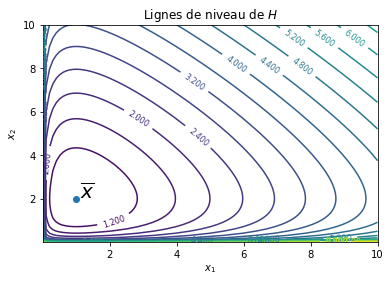

In [6]:
def H(x1,x2) :
    return d*x1 - c*np.log(x1) + b*x2 - a*np.log(x2)

x = np.linspace(0.001,10,100)
y = np.linspace(0.001,10,100)
X, Y = np.meshgrid(x, y)
Z = H(X,Y)
plt.title("Lignes de niveau de $H$")
plt.xlabel("$x_1$")
plt.ylabel("$x_2$")
C = plt.contour(X, Y, Z, 30)
plt.clabel(C, inline=1, fontsize=8)
plt.scatter([c/d],[a/b])
plt.text(c/d+0.1, a/b, "$\overline{x}$", fontsize=20)
plt.show()

H présente un minimum global en $\overline{x}$, ce qui confirme le fait que les solutions tournent autour de $\overline{x}$, et que le point $\overline{x}$ est stable.

On souhaite maintenant simuler numériquement les trajectoires.

6. Coder une fonction du type
```python
def solve_euler_explicit(f, x0, dt, t0, tf):
    ...
    return t, x
```
prenant en entrée une fonction $f : \mathbb{R} \times \mathbb{R}^{n} \longrightarrow \mathbb{R}^{n}$ quelconque, une condition
initiale $x0$, un pas de temps $dt$, les temps initiaux et finaux, et renvoyant le vecteur des temps $t^j$ et de la solution $x^j$ du schéma d’Euler explicite appliqué à $\dot{x} = f(t, x)$. La tester sur une équation différentielle aux solutions exactes connues. Vérifier la convergence du schéma lorsque $dt$ tend vers 0. Comment visualiser graphiquement l’ordre de convergence ?

In [7]:
def solve_euler_explicit(f, x0, dt, t0, tf):
    n = math.ceil((tf-t0)/dt) - 1
    t = list(np.linspace(t0, t0+n*dt, n+1)) + [tf]
    x = np.zeros((n+2,)+np.array(x0).shape)
    x[0] = x0
    for j in range(n+1) :
        psi = f(t[j],x[j])
        dt = t[j+1] - t[j]
        x[j+1] = x[j] + dt*psi
    return t, x

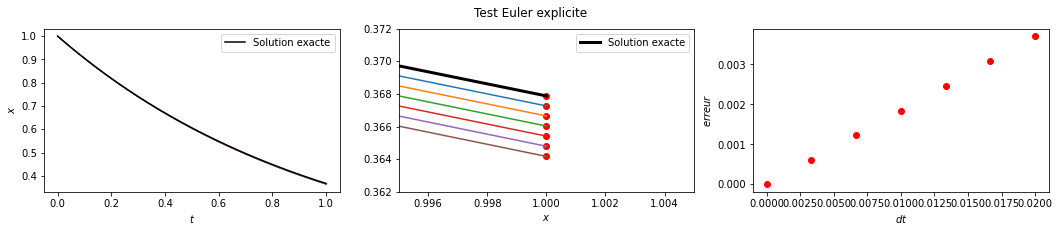

In [8]:
def f(t,x) :
    return -x

fig = plt.figure(figsize=(18, 3))
plt.suptitle("Test Euler explicite")
ax1 = plt.subplot(1,3,1)
ax2 = plt.subplot(1,3,2)
ax3 = plt.subplot(1,3,3)
ax1.set_xlabel("$t$")
ax1.set_ylabel("$x$")
ax2.set_xlabel("$x$")
ax3.set_xlabel("$dt$")
ax3.set_ylabel("$erreur$")

Ldt = []


for dt in np.linspace(1/300, 1/50,6) :
    t, x = solve_euler_explicit(f, 1, dt, 0., 1.)
    ax1.plot(t, x, linewidth = 0.8)
    ax2.plot(t, x)
    Ldt.append(x[-1])
    

t = np.linspace(0,1,501)
ax1.plot(t, np.exp(-t), color="black",
         label="Solution exacte")
ax2.plot(t, np.exp(-t), color="black",
         label="Solution exacte", linewidth = 3)
ax2.scatter(1, np.exp(-1), color="red")
ax2.scatter([t[-1]]*6, Ldt, color="red")
ax3.scatter(0, 0, color="red")
ax3.scatter(np.linspace(1/300, 1/50,6), [abs(x-np.exp(-1)) for x in Ldt], color="red")
ax1.legend()
ax2.legend()

ax2.set_ylim(0.362, 0.372)
ax2.set_xlim(0.995, 1.005)

plt.show()

On observe une relation linéaire entre $dt$ et l'écart maximal observé à $t = 1$ entre la solution exacte et celle approchée. Cela concorde avec le fait que la méthode d'Euler explicite soit convergente d'ordre 1.

7. Utiliser le schéma d’Euler explicite pour simuler les équations de Lotka-
Volterra. Que constate-t-on en temps long ? Cette résolution vous semblet-
elle fidèle à la réalité ? On pourra tracer l’évolution de la fonction $H$.

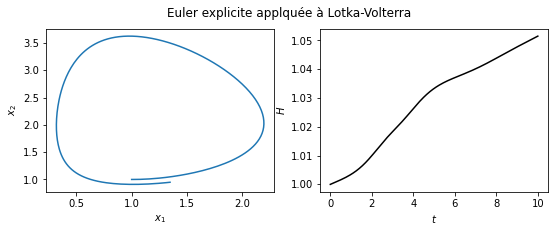

In [9]:
def LV(t,x):
    return np.array([x[0]*(a - x[1]*b),x[1]*(d*x[0] - c)])

fig = plt.figure(figsize=(9, 3))
plt.suptitle("Euler explicite applquée à Lotka-Volterra")
ax1 = plt.subplot(1,2,1)
ax3 = plt.subplot(1,2,2)
ax1.set_xlabel("$x_1$")
ax1.set_ylabel("$x_2$")
ax3.set_xlabel("$t$")
ax3.set_ylabel("$H$")

t, x = solve_euler_explicit(LV, np.array([1., 1.]), 0.05, 0, 10.)
ax1.plot(x[:,0], x[:,1])
ax3.plot(t, H(x[:,0],x[:,1]), color="black",label="H")


plt.show()

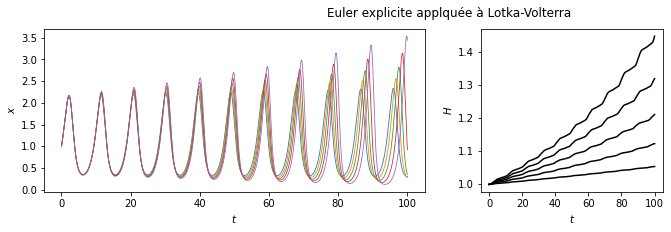

In [10]:
fig = plt.figure(figsize=(15, 3))
plt.suptitle("Euler explicite applquée à Lotka-Volterra")
ax1 = plt.subplot(1,2,1)
ax3 = plt.subplot(1,4,3)
ax1.set_xlabel("$t$")
ax1.set_ylabel("$x$")
ax2.set_xlabel("$t$")
ax3.set_xlabel("$t$")
ax3.set_ylabel("$H$")


for dt in np.linspace(0.005,0.025,5) :
    t, x = solve_euler_explicit(LV, np.array([1., 1.]), dt, 0, 100.)
    ax1.plot(t, x[:,0], linewidth = 0.8)
    ax3.plot(t, H(x[:,0],x[:,1]), color="black")

plt.show()

Au temps longs, l'erreur entre les différentes solutions croît. En outre, H semble diverger quelquesoit l'ordre de grandeur de dt. Cette résolution n'est pas en temps long fidèle à la réalité.

Toutefois, en temps court, le schéma d'Euler fournit un résultat relativement correct : 
- Si la condition initiale est $(1,2)$, c'est à dire $\overline{x}$, la solution reste constante, même aux temps longs.
- Aux temps courts, H  varie très peu (sa dérivée en t = 0 semble nulle)
- L'oscillation de $x_1$ représentée est bien autour de $1 = \overline{x}_1$

8. Coder maintenant une fonction du type
```python
def solve_euler_implicit(f, x0, dt, t0, tf, itermax = 100):
    ...
    return t, x
```
donnant la solution d’un schéma d’Euler implicite appliqué à $\dot{x} = f(t, x)$ selon la méthode présentée dans le cours. Vérifier de nouveau sa convergence sur des solutions connues. Que se passe-t-il cette fois-ci sur les équations de Lotka-Volterra ?

In [11]:
eps = 0.00001
def solve_euler_implicit(f, x0, dt, t0, tf, itermax = 100):
    n = math.ceil((tf-t0)/dt) - 1
    t = list(np.linspace(t0, t0+n*dt, n+1)) + [tf]
    x = np.zeros((n+2,)+np.array(x0).shape)
    x[0] = x0
    for j in range(n+1) :

        def Fj(s) :
            return x[j] + dt*f(t[j+1],s)
        dt = t[j+1] - t[j]
        r = x[j] + dt*f(t[j],x[j])
        n = np.linalg.norm(r)
        i = 0
        while i < itermax and np.linalg.norm((Fj(r)-r)) > eps*n :
            r = Fj(r)
            i += 1

        x[j+1] = r
    return t, x

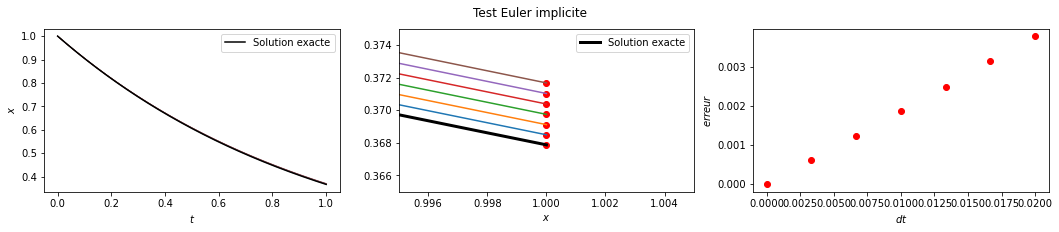

In [12]:
def f(t,x) :
    return -x

fig = plt.figure(figsize=(18, 3))
plt.suptitle("Test Euler implicite")
ax1 = plt.subplot(1,3,1)
ax2 = plt.subplot(1,3,2)
ax3 = plt.subplot(1,3,3)
ax1.set_xlabel("$t$")
ax1.set_ylabel("$x$")
ax2.set_xlabel("$x$")
ax3.set_xlabel("$dt$")
ax3.set_ylabel("$erreur$")
Ldt = []


for dt in np.linspace(1/300, 1/50, 6) :
    t, x = solve_euler_implicit(f, 1, dt, 0., 1.)
    ax1.plot(t, x, linewidth = 0.8)
    ax2.plot(t, x)
    Ldt.append(x[-1])
    

t = np.linspace(0,1,501)
ax1.plot(t, np.exp(-t), color="black",
         label="Solution exacte")
ax2.plot(t, np.exp(-t), color="black",
         label="Solution exacte", linewidth = 3)
ax2.scatter(1, np.exp(-1), color="red")
ax2.scatter([t[-1]]*6, Ldt, color="red")
ax3.scatter(0, 0, color="red")
ax3.scatter(np.linspace(1/300, 1/50,6), [abs(x-np.exp(-1)) for x in Ldt], color="red")
ax1.legend()
ax2.legend()

ax2.set_ylim(0.365, 0.375)
ax2.set_xlim(0.995, 1.005)

plt.show()

On retrouve une convergence d'ordre 1

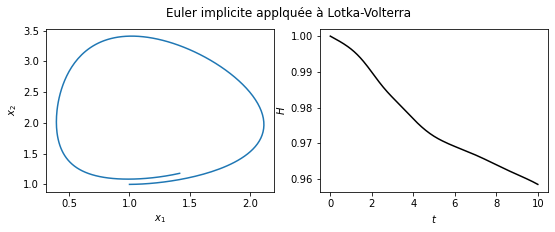

In [13]:
fig = plt.figure(figsize=(9, 3))
plt.suptitle("Euler implicite applquée à Lotka-Volterra")
ax1 = plt.subplot(1,2,1)
ax3 = plt.subplot(1,2,2)
ax1.set_xlabel("$x_1$")
ax1.set_ylabel("$x_2$")
ax3.set_xlabel("$t$")
ax3.set_ylabel("$H$")
t, x = solve_euler_implicit(LV, np.array([1., 1.]), 0.05, 0, 10.)
ax1.plot(x[:,0], x[:,1])
ax3.plot(t, H(x[:,0],x[:,1]), color="black",label="H")


plt.show()

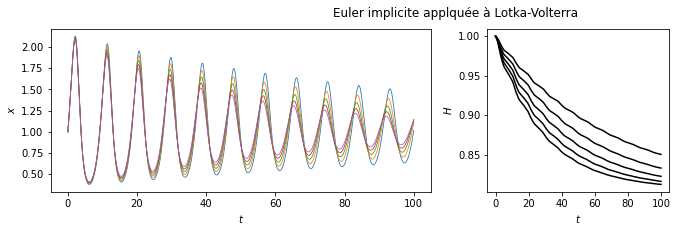

In [14]:
fig = plt.figure(figsize=(15, 3))
plt.suptitle("Euler implicite applquée à Lotka-Volterra")
ax1 = plt.subplot(1,2,1)
ax3 = plt.subplot(1,4,3)
ax1.set_xlabel("$t$")
ax1.set_ylabel("$x$")
ax2.set_xlabel("$t$")
ax3.set_xlabel("$t$")
ax3.set_ylabel("$H$")


for dt in np.linspace(0.03,0.07,5) :
    t, x = solve_euler_implicit(LV, np.array([1., 1.]), dt, 0, 100.)
    ax1.plot(t, x[:,0], linewidth = 0.8)
    ax3.plot(t, H(x[:,0],x[:,1]), color="black")

plt.show()

Cette fois, H décroît en temps long, quelquesoit le pas de temps dt, jusqu'à tendre vers $H(\overline{x})$. Ironiquement, le point $\overline{x}$ semble devenir globalement asymptotiquement stable.

On propose maintenant de modifier ces schémas de façon à stabiliser H et assurer
sa conservation le long des solutions numériques.

9. Expliquer pourquoi les solutions de
$$
\dot{x_1} = x_1(α − βx_2) − u_1(x_1, x_2)(H(x_1, x_2) − H_0)
$$
$$
\dot{x_2} = −x_2(γ − δx_1) − u_2(x_1, x_2)(H(x_1, x_2) − H_0)
$$
sont identiques à celles de Lotka-Volterra si $H_0 = H(x(0))$ pour tout
choix de $u : \mathbb{R}^{2} \longrightarrow \mathbb{R}^{2}$ continûment différentiable


**Réponse**

Soit $(x_1,x_2)$ une solution des équations de Lotka-Volterra et $(x_1(t_0),x_2(t_0)) = x_0$ une condition initiale queqlconque, avec $t_0 \in \mathbb{R}$.
$H$ est constante le long des solutions des équations de Lotka-Volterra, donc $\forall t \in \mathbb{R}^+, H(x_1(t),x_2(t)) = H_0$.
Donc $(x_1,x_2)$ est solution du problème de Cauchy :
$$
\dot{x_1} = x_1(α − βx_2) − u_1(x_1, x_2)(H(x_1, x_2) − H_0)
$$
$$
\dot{x_2} = −x_2(γ − δx_1) − u_2(x_1, x_2)(H(x_1, x_2) − H_0)
$$
et $(x_1(t_0),x_2(t_0)) = x_0$.  
Or, si on met le système d'équation sous la forme $(\dot{y_1},\dot{y_2}) = g(y_1,y_2)$, $g$ est continûment différentiable, donc le théorème de Cauchy-Lipschitz s'applique et assure que $(x_1,x_2)$ est l'unique solution du système.

Finalement, les solutions de 
$$
\dot{x_1} = x_1(α − βx_2) − u_1(x_1, x_2)(H(x_1, x_2) − H_0)
$$
$$
\dot{x_2} = −x_2(γ − δx_1) − u_2(x_1, x_2)(H(x_1, x_2) − H_0)
$$
sont identiques à celles de Lotka-Volterra.



10. Soit $H_0 \in \mathbb{R}$. Calculer la dérivée de $H − H_0$ le long des solutions de ce
nouveau système. Montrer que l’on peut choisir $u$ tel que
$$
\frac{d}{dt}(H(x(t)) − H_0) = −k||\nabla H(x(t))||^2 (H(x(t)) − H_0)
$$
En déduire qu’alors $H(x(t))$ converge exponentiellement vers $H_0$ lorsque
$t$ tend vers l’infini si $x$ reste à une distance strictement positive de $\overline{x}$.

**Réponse**

Soit $t \mapsto x(t)$ une solution du nouveau système. On a, pour $t \in \mathbb{R}$, 
$$\begin{array}{r c l}
\frac{d}{dt}(H(x(t)) − H_0) & = & \langle \nabla H(x(t)) , \dot{x}(t) \rangle \\
& = & \langle \nabla H(x(t)) , f(t,x(t)) \rangle - (H(x(t)) − H_0) \langle \nabla H(x(t)) , u(x(t)) \rangle \\
& = & - (H(x(t)) − H_0) \langle \nabla H(x(t)) , u(x(t)) \rangle \hspace{1cm} (question \hspace{0.1cm} 4)
\end{array}$$
En choisissant $u = k \nabla H$, on obtient :
$$
\frac{d}{dt}(H(x(t)) − H_0) = −k||\nabla H(x(t))||^2 (H(x(t)) − H_0) \hspace{1cm} (2)
$$  
Supposons que $x(t)$ reste à une distance $d>0$ de $\overline{x}$ pour $t\geqslant t_0$, avec $t_0\in \mathbb{R}$.  
Soit $t\geqslant t_0$. En norme infinie, on a
$
\left \{
\begin{array}{r c l}
  |x_1(t) - \overline{x}_1| & \geqslant & d \\
  ou \hspace{1.8cm} & & \\
  |x_2(t) - \overline{x}_2| & \geqslant & d
\end{array}
\right  .
$  
D'autre part,
$$||\nabla H(x(t))||^2 = γ^2 (\frac{1}{\overline{x}_1} - \frac{1}{x_1(t)})^2 + α^2 (\frac{1}{\overline{x}_2} - \frac{1}{x_2(t)})^2$$
Par stricte croissance de la fonction $x_i \longrightarrow \frac{1}{\overline{x}_i} - \frac{1}{x_i(t)}$, $i \in \{1,2\}$,
on peut fixer $C>0$ tel que
$$ \forall t \geqslant t_0, ||\nabla H(x(t))||^2 \geqslant C $$

Notons maintenant $h := H - H_0$
- Supposons qu'il existe un instant $t\geqslant t_0$ tel que $h(x(t))$ soit nul. Alors, d'après la question précédente, $t \mapsto x(t)$ est solution du problème de Lokte Volterra, donc $t \mapsto h(x(t))$ est identiquement nulle. Ce cas ne nous intéresse pas (absence d'erreur dans la conservation de $H$)
- Dans le cas contraire, on a, pour $t \geqslant t_0$,
$$
\frac{\frac{d}{dt}h(x(t))}{h(x(t))} = - k||\nabla H(x(t))||^2 \leqslant - kC
$$  
En intégrant entre $t_0$ et $t$, $ln(\frac{h(x(t))}{h(x(t_0))}) \leqslant -kC(t-t_0)$ i.e. $\boxed{h(x(t)) \leqslant h(x(t_0))e^{-kC(t-t_0)}}$
Donc $H(x(t))$ décroît exponentiellement vers $H_0$

11. En déduire comment modifier l’implémentation du schéma d’Euler pour
assurer la stabilité de $H$. Quel est le rôle de $k$ ? Peut-il être choisi arbitrairement
grand ? Pourquoi ? On pourra exprimer $H(x_{j+1})−H(x_0)$ en fonction de $H(x_j)−H(x_0)$ au premier ordre en $dt$.

In [15]:
def gradH(x0,x1) :
    return np.array([d - c/x0, b - a/x1])

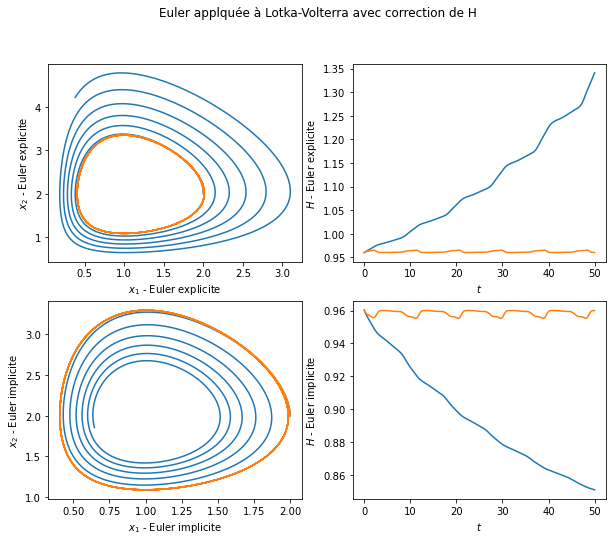

In [16]:
fig = plt.figure(figsize=(10, 8))
plt.suptitle("Euler applquée à Lotka-Volterra avec correction de H")
ax1 = plt.subplot(2,2,1)
ax2 = plt.subplot(2,2,2)
ax3 = plt.subplot(2,2,3)
ax4 = plt.subplot(2,2,4)
ax1.set_xlabel("$x_1$ - Euler explicite")
ax1.set_ylabel("$x_2$ - Euler explicite")
ax2.set_xlabel("$t$")
ax2.set_ylabel("$H$ - Euler explicite")
ax3.set_xlabel("$x_1$ - Euler implicite")
ax3.set_ylabel("$x_2$ - Euler implicite")
ax4.set_xlabel("$t$")
ax4.set_ylabel("$H$ - Euler implicite")

x0 = np.array([2, 2])
H0 = H(*x0)
tf = 50
k = 20
def LVi(t,x):
    return (np.array([x[0]*(a - x[1]*b),x[1]*(d*x[0] - c)])
            - k*gradH(x[0],x[1])*(H(*x)-H0))

t, x = solve_euler_explicit(LV, x0, 0.05, 0, tf)
t, xi = solve_euler_explicit(LVi, x0, 0.05, 0, tf)
ax1.plot(x[:,0], x[:,1])
ax1.plot(xi[:,0], xi[:,1])
ax2.plot(t, H(x[:,0],x[:,1]))
ax2.plot(t, H(xi[:,0],xi[:,1]))

t, x = solve_euler_implicit(LV, x0, 0.05, 0, tf)
t, xi = solve_euler_implicit(LVi, x0, 0.05, 0, tf)
ax3.plot(x[:,0], x[:,1])
ax3.plot(xi[:,0], xi[:,1])
ax4.plot(t, H(x[:,0],x[:,1]))
ax4.plot(t, H(xi[:,0],xi[:,1]))

plt.show()

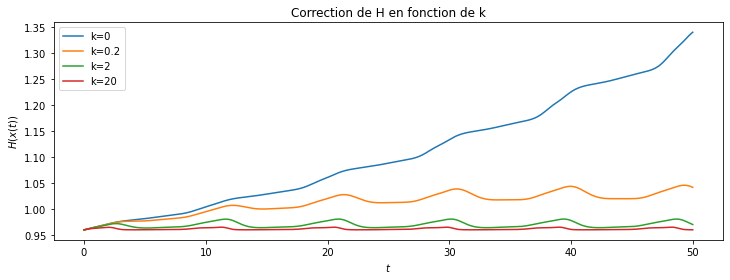

In [17]:
fig = plt.figure(figsize=(12, 4))
plt.title("Correction de H en fonction de k")
plt.xlabel("$t$")
plt.ylabel("$H(x(t))$")

x0 = np.array([2, 2])
H0 = H(*x0)
tf = 50
def LVik(k) :
    def LVi(t,x):
        return (np.array([x[0]*(a - x[1]*b),x[1]*(d*x[0] - c)])
                - k*gradH(x[0],x[1])*(H(*x)-H0))
    return LVi

for k in [0,0.2,2,20] :
    t, xi = solve_euler_explicit(LVik(k), x0, 0.05, 0, tf)
    plt.plot(t,H(xi[:,0], xi[:,1]), label = f'k={k}')

plt.legend()
plt.show()

k correspond à un coefficient de correction. Plus il est élevé, plus la correction sera brutale

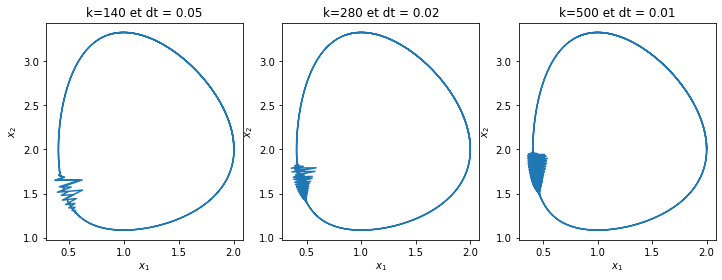

In [20]:
fig = plt.figure(figsize=(12, 4))
ax1 = plt.subplot(1,3,1)
ax2 = plt.subplot(1,3,2)
ax3 = plt.subplot(1,3,3)
ax1.set_title('k=140 et dt = 0.05')
ax1.set_xlabel("$x_1$")
ax1.set_ylabel("$x_2$")
ax2.set_title('k=280 et dt = 0.02')
ax2.set_xlabel("$x_1$")
ax2.set_ylabel("$x_2$")
ax3.set_title('k=500 et dt = 0.01')
ax3.set_xlabel("$x_1$")
ax3.set_ylabel("$x_2$")

x0 = np.array([2, 2])
H0 = H(*x0)
tf = 20
def LVik(k) :
    def LVi(t,x):
        return (np.array([x[0]*(a - x[1]*b),x[1]*(d*x[0] - c)])
                - k*gradH(x[0],x[1])*(H(*x)-H0))
    return LVi

k = 140
t, xi = solve_euler_explicit(LVik(k), x0, 0.05, 0, tf)
ax1.plot(xi[:,0], xi[:,1])

k = 280
t, xi = solve_euler_explicit(LVik(k), x0, 0.02, 0, tf)
ax2.plot(xi[:,0], xi[:,1])

k = 500
t, xi = solve_euler_explicit(LVik(k), x0, 0.01, 0, tf)
ax3.plot(xi[:,0], xi[:,1])

plt.show()

Pour obtenir la convergence du modèle, on ne peut pas choisir k arbitrairement grand. A partir d'une certaine valeur de k, des artefacts commencent à apparaître sur la solution.  
Au premier ordre en $dt$, on a, d'après (2),
$$\begin{array}{r c l}
H(x_{j+1})-H(x_{0}) & = & H(x_{j})-H(x_{0}) +\left.\left.\left.\frac{d}{dt}\right(H(x(t)) − H_0\right)\right|_{t_j} dt \\
& = & (H(x_{j})-H(x_{0})) (1−k||\nabla H(x(t))||^2dt)
\end{array}$$ 
Ainsi, si $k$ est très grand devant $\frac{1}{dtC}$, on a $\left|\frac{H(x_{j+1})-H(x_{0})}{H(x_{j})-H(x_{0})}\right|>>1$.  
Donc, pour k trop grand, l'approximation au premier ordre, qui est celle réalisée par le schéma d'Euler, n'est plus convenable.